# Affective Computing - Programming Assignment 2

### Objective

Your task is to extract a set of prosodic correlates (i.e. suprasegmental speech parameters) and cepstral features from speech recordings. Then, an emotion recognition system is constructed to recognize happy versus sad emotional speech (a quite easy two class problem) using a simple supervised classifier training and testing structure.

The original speech data is a set of simulated emotional speech (i.e. acted) from ten speakers speaking five different pre-segmented sentences of roughly 2-3 seconds in two different emotional states (happy and sad) totaling 100 samples.
Basic prosodic features (i.e. distribution parameters derived from the prosodic correlates) are extracted using a simple voiced/unvoiced analysis of speech, pitch tracker, and energy analysis. Another set of Mel-Frequency Cepstral Coefficients (MFCC) features are also calculated for comparison. 

Support Vector Machine (SVM) classifiers are trained. A random subset of 1/2 of the available speech data (i.e. half of the persons) is used to train the emotion recognition system, first using a set of simple prosodic parameter features and a then a classical set of MFCC derived features. The rest of the data (the other half of the persons) is then used to evaluate the performances of the trained recognition systems.

<!--### Implementation
<!---The data and toolbox files used in this exercise are:
Study the toolbox functions (e.g. ‘getF0’, ‘melcepst’) and the generic MATLAB functions (e.g. ‘hamming’, ‘conv’, ‘resample’, ‘filter’, ‘mean’, ‘std’, ‘prctile’, ‘kurtosis’, ‘sum’, ‘length’, ‘linspace’, ‘trainsvm’, ‘svmclassify’, and ‘confusionmat’) as they are needed in the exercise.-->

<!--Nine dictionaries are stored in the provided data file:-->

<!--* speech_sample
* testing_class 
* testing_data_mfcc 
* testing_data_proso 
* testing_personID 
* training_class 
* training_data_mfcc 
* training_data_proso 
* training_personID -->

<!--To access one dictionary, using [`scipy.io`](https://docs.scipy.org/doc/scipy/reference/io.html) library for example: scipy.io.loadmat('filePath')['dictoionaryName']. **speech_sample** is used in the feature extraction part and the pre-extracted features in the emotion recognition part of this lab are **testing_class**, **testing_data_mfcc**, **testing_personID**, **training_class**, **training_data_mfcc**, **training_data_proso**, **training_personID**.-->


## Task 0. Preparation
Downsample the ‘speech_sample’ from the original Fs of 48 kHz to 11.025 kHz using [`scipy.signal.resample()`](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html) function.

**Steps**:
1. Load the data 'speech_sample' from file *lab2_data.mat*. Make sure the sample is a 1-D time series by reshaping it.
2. Declare the sampling frequency of the original signal, and the new sampling frequency.
3. Resample the signal using [`scipy.signal.resample()`](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html).
4. Visualize the resampled signal in the time domain. Use an appropriate time vector as the x-axis.

<!--### Task 0.1. Load Data
Load the ‘speech_sample’ from the provided dataset containing a raw speech waveform and do the following (Note, the sampling rate (fs) of the sample speech signal is 48 kHz):-->

In [1]:
!pip install matplotlib

In [2]:
import numpy as np
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt

# 1. Load the 'speech_sample'
exercise_data = sio.loadmat('lab2_data.mat')
speech_sample = exercise_data['speech_sample'].reshape(-1)

# 2. Declare the source sampling frequency, and the target sampling frequency.
#    2.1 Source sampling frequency
fs_source = 48000.0

#    2.2 Target sampling frequency
# Target frequency
fs_down = 11025.0

# 3. Downsample the speech sample
speech_resampled = signal.resample(speech_sample, np.round(len(speech_sample) * fs_down / fs_source).astype('int'))

# 4. Visualize the downsampled speech signal in the time domain.
#    4.1 Create the corresponding time vector, whose length is the same as the length of the given signal. 
#        Use either np.linspace() or np.arange()

Tvec = np.linspace(0,2.5,len(speech_resampled))

#    4.2 Plot your result
plt.plot(Tvec,speech_resampled)

## Task 1. Feature Extraction

### Task 1.1 MFCC calculations using the provided sample speech signal.

**Steps**:
1. Pre-emphasize the resampled signal by applying a high pass filter, using the [`scipy.signal.lfilter()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) function.
   Apply a pre-emphasis filter $ H(z) = 1- \alpha z^{-1} $ with $\alpha = 0.98$ to emphasize higher frequencies in your downsampled speech signal (Tip: use [`scipy.signal.lfilter`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.lfilter.html)). 
   
   Hint for defining the filter: you will provide two vectors **b** and **a** to define the filter, **a** for the denominator and **b** for the numerator. So finally your filter will be defined as $$H(z) = \frac{b[0] z^0 + b[1] z^{-1} + ... + b[i] z^{-i}+...}{a[0] z^0 + a[1] z^{-1} + ... + a[i] z^{-i}+...}$$
2. Extract the 12 mfcc coefficients by using the [`python_speech_features.mfcc()`](http://python-speech-features.readthedocs.io/en/latest/) function.
    1. **The [`python_speech_features.mfcc()`](http://python-speech-features.readthedocs.io/en/latest/) function has an internal pre-emphasis functionality. However, we calculate the pre-emphasis by hand in order to have a better understanding of it, and thus it should be set to 0** 
3. Visualize the 12 mfcc coefficient contours.
4. Calculate the mean of each contour using [`numpy.mean(axis=axis)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

[ -2.16803659  -7.55293839 -11.45023659  -9.15052974  -4.9467118
 -18.90732587  -9.39367434  -0.93334243   1.59932744  -7.89636553
 -13.94829969  -0.62393599]


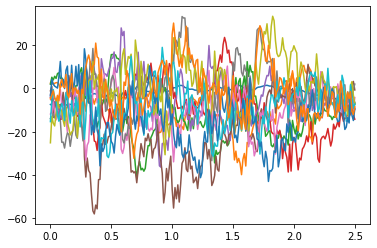

In [4]:
from scipy.signal import lfilter
from python_speech_features import mfcc
# 1. Pre-emphasize the resampled signal.
#    1.1 Define the polynomials of the fitler
#        filter coefficients b, which is the numerator
#        filter coefficients a, which is the denominator
a = [1]
b = [1,-0.98]

#    1.2 Apply the filter on the signal
pre_emphasized_sample = lfilter(b,a,speech_resampled)

# 2. Extract the mfcc coefficients by using the mfcc() function
     # remeber to set the pre-emphasize argument to 0 since the signal has been pre-emphasized already.
frame_len = int(2 ** np.floor(np.log2(0.03 * fs_down)))
mfcc_contour = mfcc(pre_emphasized_sample, fs_down, winlen = frame_len / fs_down,
                    winstep = frame_len / (2 * fs_down), numcep = 12, preemph = 0)

# 3. Plot the 12 mfcc contours
Time_vec = np.linspace(0,2.5,len(mfcc_contour))
plt.plot(Time_vec, mfcc_contour)

# 4. Calculate the mean for each contour.
Mean_contour = np.mean(mfcc_contour, axis=0)
print (Mean_contour)

In [ ]:
? np.mean

### Question 1. Why do we need to pre-emphasize the speech signal before computing the MFCC feature?

### Your answer: To compensate the high-frequency part

### Task 1.2 Extract the Intensity/Energy parameter
Firstly, calculate the short time energy (STE) of the downsampled ‘speech_sample’ using the squared signal $x(t)^2$ and a 0.01s hamming window frames (Note! the extra length of the window. Clip half a window length from the beginning and at the end). Then calculate the 5 distribution parameter features specified below from the utterance (the signal).


**Steps**:
1. Define a hamming window using the [`scipy.signal.hamming()`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.hamming.html) function. The window length is the number of frames in 0.01s.

2. Apply the hamming window to convolve the squared signal, using the [`scipy.signal.convolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) function. The convolution result is the short time energy (STE) controu.
3. Clip half window of frames from the begining and ending of STE contour.
4. Visualize the resulted STE controur.
5. Calculating the following 5 distribution parameter feature from the STE contour:
    1. Mean, using the [`numpy.mean(https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html)`]() function.
    2. Standard Deviation (SD), using the [`numpy.std()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.std.html) function.
    3. 10% percentile, using the [`numpy.percentile()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html) function.
    4. 90% percentile, using the [`numpy.percentile()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html) function.
    5. Kurtosis, using the [`scipy.stats.kurtosis()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) function.


[0.7478650778846413, 0.9053065294782029, 0.00738155833812092, 2.0824150050645756, 1.936277920821584]


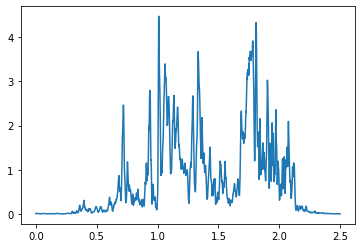

In [5]:
from scipy.stats import kurtosis
# 1. Define a hamming window
#    1.1 Calculate the window length, which is the number of frames within 0.01s
hamming_length = int(fs_down*0.01)

#    1.2 Define the hamming window using signal.hamming()
hamming_window = signal.hamming(hamming_length, sym=True)

# 2. Calculate the short time energy (STE) contour by convolving the hamming window and the squared signal, 
#    using the scipy.signal.convolve() function
ste = signal.convolve(speech_resampled*speech_resampled , hamming_window)

# 3. Clip half a window of frames from both the beginning and end of the STE contour
# hamming_length = 110
new_ste = ste[55:-55]

# 4. Visualize the final STE contour.
#    4.1 Create the time vector for x-axis
Xvec = np.linspace(0,2.5,len(new_ste))
#    4.2 Visualize the STE contour
plt.plot(Xvec, new_ste)

# 5. Calculate the 5 distribution parameter features the of STE contour
Ans_A = np.mean(new_ste)
Ans_B = np.std(new_ste)
Ans_C = np.percentile(new_ste,10)
Ans_D = np.percentile(new_ste,90)
Ans_E = kurtosis(new_ste)

print([Ans_A,Ans_B,Ans_C,Ans_D,Ans_E])

### Question 2. Why do we need to clip out half a frame from both the beginning and the ending of the STE?

### Your answer: That makes data more reliable

In [ ]:
?kurtosis

In [ ]:
?np.linspace

### Task 1.3. Extract the Pitch/F0 feature
**Steps**:
1. Extract the Pitch/F0 contour of the resampled speech signal using the **get_f0()** function in 0.01s frames. The function is provided in the *f0_lib.py* file.
2. Visualize the F0 contour.
3. Extract the 5 distribution parameter features of the extracted F0 countour.



C:\Users\안건\Desktop\자료\교환학생\Affective computing\Exercise2\f0_lib.py:171: RuntimeWarning: divide by zero encountered in true_divide
  ran = ra / rw;
C:\Users\안건\Desktop\자료\교환학생\Affective computing\Exercise2\f0_lib.py:171: RuntimeWarning: invalid value encountered in true_divide
  ran = ra / rw;


[135.50884956 132.2418136  133.83102695 135.44226044 135.49219614
 134.27109974 135.69230769 137.12686567   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0. 

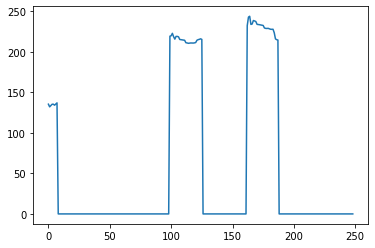

In [6]:
import numpy as np
import scipy.io as sio
from scipy import signal
import scipy
from f0_lib import get_f0

# 1. Extract the F0 contour
f0, _, _, _ = get_f0(speech_resampled, fs_down)
print (f0)
print (len(f0))

# 2. Visualize the F0 contour
plt.plot(f0)

# 3. Calculate these distribution parameter features
print ([np.mean(f0),np.std(f0), np.percentile(f0,10), np.percentile(f0,90),kurtosis(f0)])


### Task 1.4. Extract the Rhythm/Durations parameter
**Steps**:
1. Perform a Voiced/Unvoiced speech segmentation of speech signal. Tip: Unvoiced frames are marked with 0 F0 values, you can find the voiced frames (i.e. F0 > 0) using [`numpy.where()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.where.html).
2. From the segmentation, calculate the means and SDs of both Voiced and Unvoiced segment lengths (i.e. voiced segment mean length, SD of voiced segment lengths, unvoiced segment mean length, SD of unvoiced segment lengths).
3. Calculate also the voicing ratio, i.e. the ratio of voiced segments versus total segments (Tip: You can do this simply by using the frames).



In [ ]:
?np.where

In [ ]:
random = np.arange(10)
print(random)
R_where = np.where(random > 1, random, 0)
print (R_where)

In [ ]:
# 1. Segmenting the voiced and unvoiced speech segements.
voiced_inds = np.where(f0 > 0)[0]
diff = voiced_inds[1:] - voiced_inds[: -1]
voiced_to_unvoiced_inds = np.where(diff > 1)[0]
voiced_seg_n = len(voiced_to_unvoiced_inds) + 1
voiced_seg_lengths = np.zeros(voiced_seg_n)
tmp = voiced_inds[0]


for i in range(voiced_seg_n - 1):
    voiced_seg_lengths[i] = voiced_inds[voiced_to_unvoiced_inds[i]] - tmp + 1
    tmp = voiced_inds[voiced_to_unvoiced_inds[i] + 1]
    
voiced_seg_lengths[-1] = voiced_inds[-1] - tmp + 1

######################################################
######################################################


unvoiced_inds = np.where(f0 == 0)[0]
diff2 = unvoiced_inds[1:] - unvoiced_inds[:-1]
unvoiced_to_voiced_inds = np.where(diff2 > 1)[0]
unvoiced_seg_n = len(unvoiced_to_voiced_inds) + 1
unvoiced_seg_lengths = np.zeros(unvoiced_seg_n)
tmp2 = unvoiced_inds[0]

for i in range(unvoiced_seg_n - 1):
    unvoiced_seg_lengths[i] = unvoiced_inds[unvoiced_to_voiced_inds [i]] - tmp2 + 1
    tmp2 = unvoiced_inds[unvoiced_to_voiced_inds[i] + 1]
    
unvoiced_seg_lengths[-1] = unvoiced_inds[-1] - tmp2 + 1






# 2. Calculate the means and SDs of both Voiced and Unvoiced segment lengths

ans_1 = np.mean(voiced_seg_lengths)
ans_2 = np.mean(unvoiced_seg_lengths)
ans_3 = np.std(voiced_seg_lengths)
ans_4 = np.std(unvoiced_seg_lengths)

print ([ans_1, ans_2, ans_3, ans_4])

print((voiced_seg_lengths))
print(len(voiced_seg_lengths))
print((unvoiced_seg_lengths))


# 3. Calculate the voicing ratio.
ratio =float(len(voiced_seg_lengths))/ float((len(voiced_seg_lengths))+(len(unvoiced_seg_lengths)))
print (ratio)

In [ ]:
?float

### Question 3. What is the difference between voiced and unvoiced sounds? Give some examples of each.

### Your answer: All vowels and some consonants are voiced sounds. That they vibrate membrane in the neck. ex) /b/ /d/ /g/ /v/ /ð/ /members/ /n/ /l/ /w/ /j/.  unvoiced sound do not use the vocal cords to produce their hard, percussive sounds. ex)  Ch, F, K, P, S, Sh, 



### Task 1.5. Check the extracted features
1. Print your calculated 12 MFCC coefficients.
2. Print the distribution parameter features of the STE contour.
3. Print the distribution parameter features of the F0 contour.
4. Print the 5 prodosic features: **mean** and **std** of lengths of **voiced speeches** and **unvoiced speech**, as well as the **voicing ratio**. 


In [ ]:
# 1. Print the 12 MFCC coefficients
a= np.mean(mfcc_contour, axis=0)
print (a)
# 2. Print the distribution paremeter features of the STE contour
print([Ans_A,Ans_B,Ans_C,Ans_D,Ans_E])
# 3. Print the distribution parameter features of the F0 contour
print ([np.mean(f0),np.std(f0), np.percentile(f0,10), np.percentile(f0,90),kurtosis(f0)])
# 3. Print the 5 prodosic features
print ([ans_1, ans_2, ans_3, ans_4, ratio])


## Task 2. Speech Emotion Classification

In this part, the [`sklearn.svm`](http://scikit-learn.org/stable/modules/svm.html) library is used to perform the speech signal classification. The **‘training_data_proso’** and **‘training_data_mfcc’** matrices contain the calculated prosodic features for the training set (9 features in each row representing a speech sample) and MFCC derived features (12 features) respectively. The **‘training_class’** group vector contains the class of samples: 1 = happy, 2 = sad; corresponding to the rows of the training data matrices.

<!---
Test the classifiers and plot confusion matrices.
* Use the ‘svmclassify’ function (and your trained SVM structures) to classify the ‘training_data_*’ and the ‘testing_data_*’ data matrices. Then, calculate average classification performances for both training and testing data. The correct class labels corresponding with the rows of the training and testing data matrices are in the variables ‘training_class’ and ‘testing_class’, respectively.
    * 	Calculate the average classification performances for the training data (‘training_data_proso’ and ‘training_data_mfcc’) using the corresponding prosody and MFCC trained SVMs.
    * 	Calculate the average classification performance for the testing data (‘testing_data_proso’ and testing_data_mfcc’) using the corresponding prosody and MFCC trained SVMs.
* Plot confusion matrices for the training and testing data for both classifiers. Tip, use ‘confusionmat’ function.-->



<!---speech_sample
testing_class
testing_data_mfcc
testing_data_proso
testing_personID
training_class
training_data_mfcc
training_data_proso
training_personID
### Task 2.1. Preparing your data
Dictionaries of the data are listed below:
* speech_sample
* testing_class
* testing_data_mfcc
* testing_data_proso
* testing_personID
* training_class
* training_data_mfcc
* training_data_proso
* training_personID
Use [`scipy.io.loadmat()`] to read the dataset.-->

### Task 2.1. Train the SVM classifiers
**Steps**:
1. Load the training data.
2. Train a SVM with the prosody data using the **‘training_data_proso’** features and a **3rd order polynomial** kernel.
3. Train a SVM with the MFCC data using the **‘training_data_mfcc’** features and a **3rd order polynomial** kernel.

In [7]:
# Initialize the SVM classifiers.
from sklearn import svm

# 1. Load data
exercise_data = sio.loadmat('lab2_data.mat')

#    1.1 Load 'training_data_proso'
training_data_proso = exercise_data['training_data_proso']

#    1.2 Load 'training_data_mfcc'
training_data_mfcc = exercise_data['training_data_mfcc']


#    1.3 Load 'training_class'
training_class = exercise_data['training_class'].reshape(-1)




# 2. Train a classifier using the prodosic data
#    2.1 Initialize a svm classifer
cl_proso = svm.SVC(degree=3, kernel='poly')
#    2.2 Train the classifier
cl_proso.fit(training_data_proso, training_class) 


# 3. Train a classifer using the mfcc data
#    2.1 Initialize a svm classifer

cl_mfcc = svm.SVC(degree=3, kernel='poly')


#    2.2 Train the classifier
cl_mfcc.fit(training_data_mfcc, training_class)


C:\Users\Public\New folder\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Public\New folder\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Task 2.2. Test the classifiers
Classify the **‘training_data_*’** and the **‘testing_data_*’** data matrices. Then, calculate average classification performances for both training and testing data. The correct class labels corresponding with the rows of the training and testing data matrices are in the variables ‘training_class’ and ‘testing_class’, respectively.

**Steps**:
1. Load the testing data.
2. Calculate the average classification accuracy for the training data (**‘training_data_proso’** and **‘training_data_mfcc’**) using the corresponding prosody and MFCC trained SVMs.
3. Calculate the average classification accuracy for the testing data (**‘testing_data_proso’** and **‘testing_data_mfcc’**) using the corresponding prosody and MFCC trained SVMs.
4. Print the four accuracies you have calculated.

In [12]:
# 1. Load testing data
testing_data_mfcc = exercise_data['testing_data_mfcc']
testing_data_proso = exercise_data['testing_data_proso']
testing_class = exercise_data['testing_class'].reshape(-1)

# 2. Calculate the average classification performances for the training data
pred_proso_train = cl_proso.predict(training_data_proso)
pred_mfcc_train = cl_mfcc.predict(training_data_mfcc)


# 3. Calculate the average classification performance for the testing data

pred_proso_test = cl_proso.predict(testing_data_proso)
pred_mfcc_test = cl_mfcc.predict(testing_data_mfcc)

# 4. Print the four accuracies.
print (pred_proso_train, pred_mfcc_train, pred_proso_test, pred_mfcc_test )
print (training_class)

a=0
for i in range (0, training_class.shape[0]):
    if pred_proso_test[i] == training_class[i] :
        a= a+ 1 
        
acc_pred_prso_test = (a/training_class.shape[0]*100) 


print (acc_pred_prso_test)

def cal_acc(str_):
    x=0
    for i in range (0, training_class.shape[0]):
        if str_[i] == training_class[i] :
            x= x+ 1 
    acc_str = (x/training_class.shape[0]*100) 
    print (acc_str)
    return ;
    
cal_acc(pred_proso_train)
cal_acc(pred_mfcc_train)
cal_acc(pred_proso_test)
cal_acc(pred_mfcc_test)

[1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2
 2 2 2 1 1 1 1 1 2 2 2 2 2] [1 1 2 1 1 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2
 2 2 2 1 1 1 1 1 2 2 2 2 2] [1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2] [1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 1 1 2 2 2 2 2]
[1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2
 2 2 2 1 1 1 1 1 2 2 2 2 2]
84.0
100.0
96.0
84.0
86.0


In [ ]:
?cl_proso.predict

In [ ]:
? if

### Question 4. Which one of the extracted features performed better?

### Your answer:  prosody data with training works better

### Task 2.3. Plot confusion matrices for the training and testing data for both classifiers. 
Print following confusion matrix(Tip, use [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function):
* The confusion matrix of the prosody trained SVM using the **‘training_data_proso’**.
* The confusion matrix of the prosody trained SVM using the **‘testing_data_proso’**.
* The confusion matrix of the MFCC trained SVM using the **‘training_data_mfcc’**.
* The confusion matrix of the MFCC trained SVM using the **‘testing_data_mfcc’**.

In [ ]:
from sklearn.metrics import confusion_matrix
a= confusion_matrix(training_class, pred_proso_train) 

b=confusion_matrix(training_class, pred_mfcc_train) 

c=confusion_matrix(training_class, pred_proso_test) 

d=confusion_matrix(training_class, pred_mfcc_test) 

print (a,b,c,d)

In [28]:
? np.concatenate

## Task 3. Speech Emotion Classification, Subject Independent
Generate a person independent 10-fold cross-validation (CV) estimate of the emotion recognition system performance.
* Join the training/testing data matrices and the class vectors. Combine also the ‘training_data_personID’ and ‘testing_data_personID’ vectors that are needed to make the CV folds.

* Construct the CV folds by training ten SVMs. For each SVM nine persons’ data is used as the training set (i.e. 90 samples) and one persons’ samples are kept as the test set (i.e. 10 samples) for the respective fold (i.e. each SVM has different persons’ samples excluded from the training set). Test each ten trained SVMs by using the corresponding one held-out persons’ samples and then calculate the average classification performances for each fold.

* Calculate the mean and SD of the ten CV fold performances to produce the final CV performance estimate of the emotion recognition system.

In [26]:
#print(exercise_data['training_personID'])
print(exercise_data.keys())
personID_train = exercise_data['training_personID']
personID_test = exercise_data['testing_personID']

feature_proso_all = np.concatenate((training_data_proso, testing_data_proso), axis = 0)

personID_all = np.concatenate((personID_train, personID_test))


class_all = np.concatenate((training_class, testing_class))





uniquePerson = np.unique(personID_all)

accArray = np.zeros(len(uniquePerson))

print (np.where(personID_all == 1)[0])
i = 0
for personID in uniquePerson:
    
    ind_test = np.where(personID_all == personID)[0]
    ind_train = np.where(personID_all != personID)[0]
    
    
    sample_test = feature_proso_all [ind_test]
    label_test = class_all [ind_test]
    
    sample_train = feature_proso_all [ind_train]
    label_train = class_all [ind_train]


    cl_sample = svm.SVC(kernel='linear')

    cl_sample.fit(sample_train, label_train) 
   
    
    pred = cl_sample.predict(sample_test)
    
    accArray[i] = sum(pred == label_test)/len(ind_test)
    i  += 1

print (accArray)





dict_keys(['__header__', '__version__', '__globals__', 'speech_sample', 'testing_class', 'testing_data_mfcc', 'testing_data_proso', 'testing_personID', 'training_class', 'training_data_mfcc', 'training_data_proso', 'training_personID'])
[0 1 2 3 4 5 6 7 8 9]
[1.  1.  0.9 0.9 1.  0.8 1.  0.6 0.9 1. ]


In [ ]:
print(exercise_data['testing_personID'])